# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,21217,6208,14982,3095,6707,602
1,16448,6243,6360,824,2662,2005
2,8607,1750,3580,47,84,2501


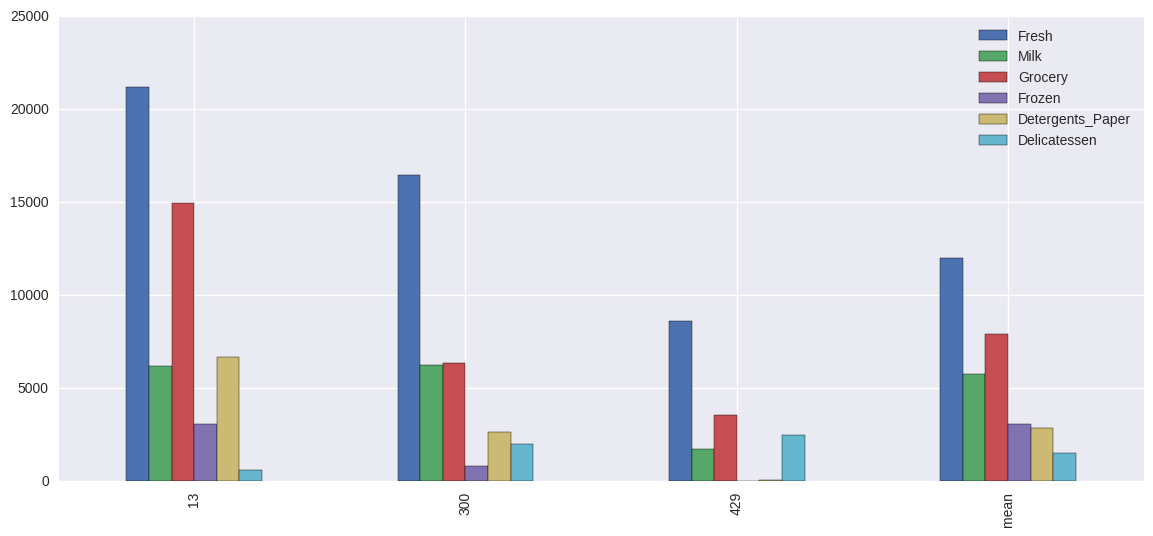

In [3]:
indices = [13,300,429]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Analyzing the previous graph:
Sample 13:  This customer is spending more than the general average on: Fresh, Grocery and Detergents_Paper. 
Sample 300: This customer spends above the general average only in Fresh. 
Sample 429: This customer does not spends above the general average on products. 

The sample 13 could represent a coffee shop or restaurant, given the amount of Detergents_Paper, Grocery, Fresh
and Milk spent.

Since the sample 300 only spends more than the general average on Fresh, and the other products are with the average on under it, this could represent some restaurant that mainly sells sandwiches with some other products.

The sample 429 almost doesn't spend money with Detergents_Paper, and all the products are under the general average. This could represent some small retail store, where the cleaning is not a differential, and sells all kind of products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for i in range(data.columns.size):
    vec=list()
    for n in range(data.columns.size):
        if n != i:
            vec.append(n)

    X=data[data.columns[vec]]
    y=data[data.columns[i]]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)
    regressor = DecisionTreeRegressor(random_state=23).fit(X_train,y_train)
    print 'For the product {} the score was {}' .format(data.columns[i],regressor.score(X_test,y_test))


For the product Fresh the score was -1.07567741497
For the product Milk the score was 0.493870361639
For the product Grocery the score was 0.718409124285
For the product Frozen the score was -0.0454090784171
For the product Detergents_Paper the score was 0.793049741582
For the product Delicatessen the score was 0.027209862392


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  Instead of just trying to predict a random feature, I made a loop to determine the R^2 scores.

Looking at it, Fresh and Frozen presented a negative R^2 score, which means that these features cannot be predicted. To identify the customers' spending habits, these particular features are really relevant. 
Delicatessen presented a really low R^2 score making this a relevant feature too.
Milk,Grocery and Detergents_Paper were the features with the higher R^2 score, meaning that they aren't too relevant to identify customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

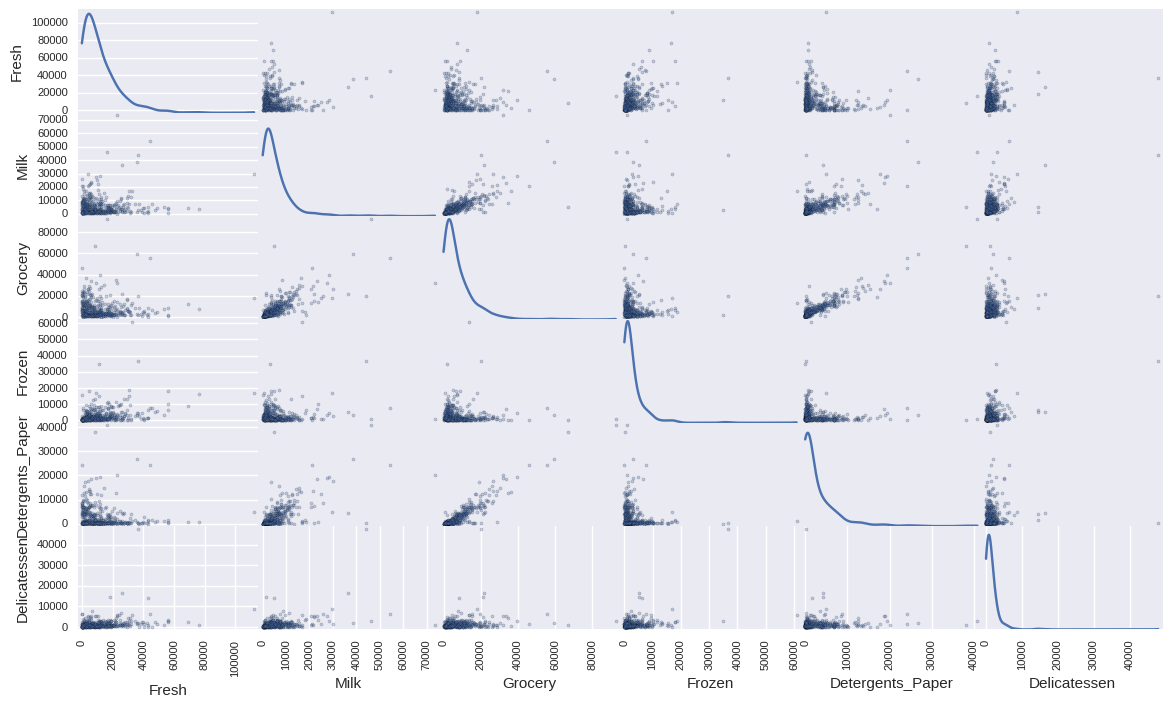

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The pair Grocery&Detergents_Paper seems to present the clearer degree of correlation in this visualization. The following pairs present some degree of correlation (This comparison is just for the item previously removed, which is Grocery):
- Grocery&Detergents_Paper
- Grocery&Milk
- Grocery&Delicatessen

None of the features are normally distributed. All of them showed to be skewed to the right.

After reading the explanation given in *Visualize Feature Distributions*, the natural conclusion is that the Grocery being an important feature was wrong. Grocery is correlated with 3 others features.
Analyzing this scatter plot, Frozen turns out to be the less correlated feature followed by Fresh. And looking to the results of the first question, the r^2 score confirms that. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

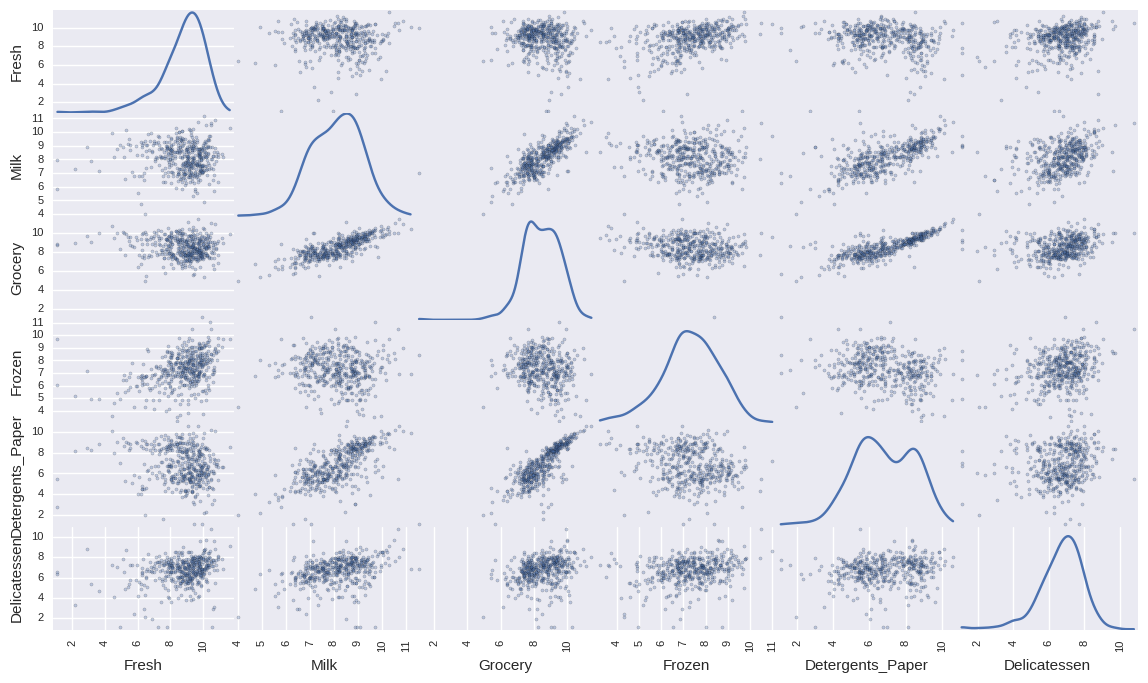

In [7]:
log_data = np.log(data)

log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.962558,8.733594,9.614605,8.037543,8.810907,6.400257
1,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399
2,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
# For each feature find the data points with extreme high or low values
#in indices is stored the sample data index
outliers=[]
outD={}
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    
    for i in range(len(log_data[feature])):
        if (log_data[feature][i] >= Q1-step) & (log_data[feature][i] <= Q3+step):
            continue
        else:
            outD[i] = outD.get(i,0)+1
            if (i not in indices) & (i not in outliers):
                outliers.append(i)
        
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])


print 'Number of outliers: {}'.format(len(outliers))
print 'Outliers repeated in more than one feature: {}'.format(dict((k, v) for k, v in outD.items() if v > 1))
few_outliers = dict((k, v) for k, v in outD.items() if v > 1)
outliers = few_outliers.keys()
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers: 41
Outliers repeated in more than one feature: {128: 2, 65: 2, 154: 3, 75: 2, 66: 2}


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Using Tukey's Method, it was found:
- 41 outliers total outliers. (If the index was present in more feature, this outliers counts only as 1)
- 4 outliers present in 2 features
- 1 outliers present in 3 features



- **Before 1st revision**:
I decided to remove all 41 samples from the dataset. It represents a remotion of ~9.32% of the dataset.
The best option would be to remove only the outliers of each feature in order to keep the data health. But I don't know  yet how an unbalanced number of features would affect the rest of the project. So in order to move on without problems, this was the best decision. 

- **After the 1st revision**:
Given the suggestion, I'm only removing 5 outliers now, the ones that were present on more than one feature. Indeed, removing all outliers was a little too much to the dataset.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

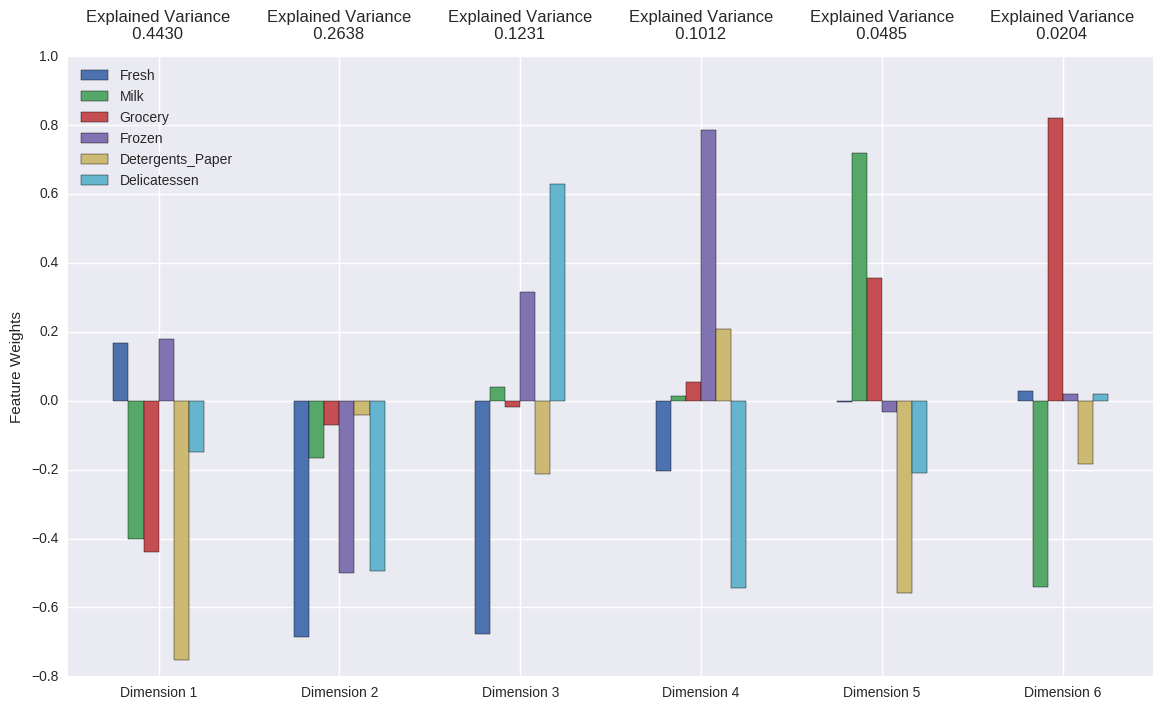

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6,random_state=23).fit(good_data)

pca_samples = pca.transform(log_samples)

pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 
#After Fisrt revision
Total Variance explained:
- First and Second principal component: 0.7068
- First four principal component: 0.9311

Defining that higher the weight, higher the correlation with this dimension, it will be analyzed each dimension separately

1st dimension:
Only Fresh and Frozen present some correlation with this dimension, the other features are negatively weighted, which means that they almost aren't correlated to this dimension

2nd dimension:
All features are negatively weighted

3rd and 4th dimension:
Frozen presented some higher correlation with these dimensions, while Delicatessen was better correlated to dimension 3 and Detergents_Paper to dimension 4.

The difference between this version and the first submission are the number of outliers. Clearly, removing only 5 outliers changed a lot the relationship between the dimensions and products' correlation. Before were easier to identify what each dimension was trying to explain. However, the total variance explained for all four principal components improved, meaning that the decomposition of the data improved without removing so many outliers. 


----------------------------------------------------------------------------------------------------------------
#Before First revision
Total Variance explained:
- First and Second principal component: 0.7225
- First four principal component: 0.8725

Defining that higher the weight, higher the correlation with this dimension, it will be analyzed each dimension separately

1st dimension:
Detergents_Paper presents the higher correlation with this dimension
Milk and Grocery presents some high correlation too
Delicatessen still presents some correlation
Fresh and Frozen are not too correlated with this dimension

2nd dimension:
The three features that presented the lower correlation with the first dimension (Delicatessen,Fresh and Milk), now showed the higher weight for this dimension, while the other three features presented a really low correlation.

3rd and 4th dimension:
Only the feature Delicatessen presented some higher correlation with these dimensions, compared to the others. By this point, the Total variance explained is about 0.8725, which means that almost all the correlation needed to evaluate for this dataset was specified in 4 dimensions. 

In terms of customer spending: 
The products: Milk, Grocery and Detergents_Paper are the products that most represents one segment of customer, followed by: Frozen, Fresh and Delicatessen, that would represent another segment of customer.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8891,-1.3001,-1.1945,0.9689,-0.2426,0.2970
1,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514
2,1.4269,1.2099,-0.1030,-3.9222,0.6257,0.5211


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
pca = PCA(n_components=2,random_state=23).fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.8891,-1.3001
1,-1.2804,-0.9587
2,1.4269,1.2099


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

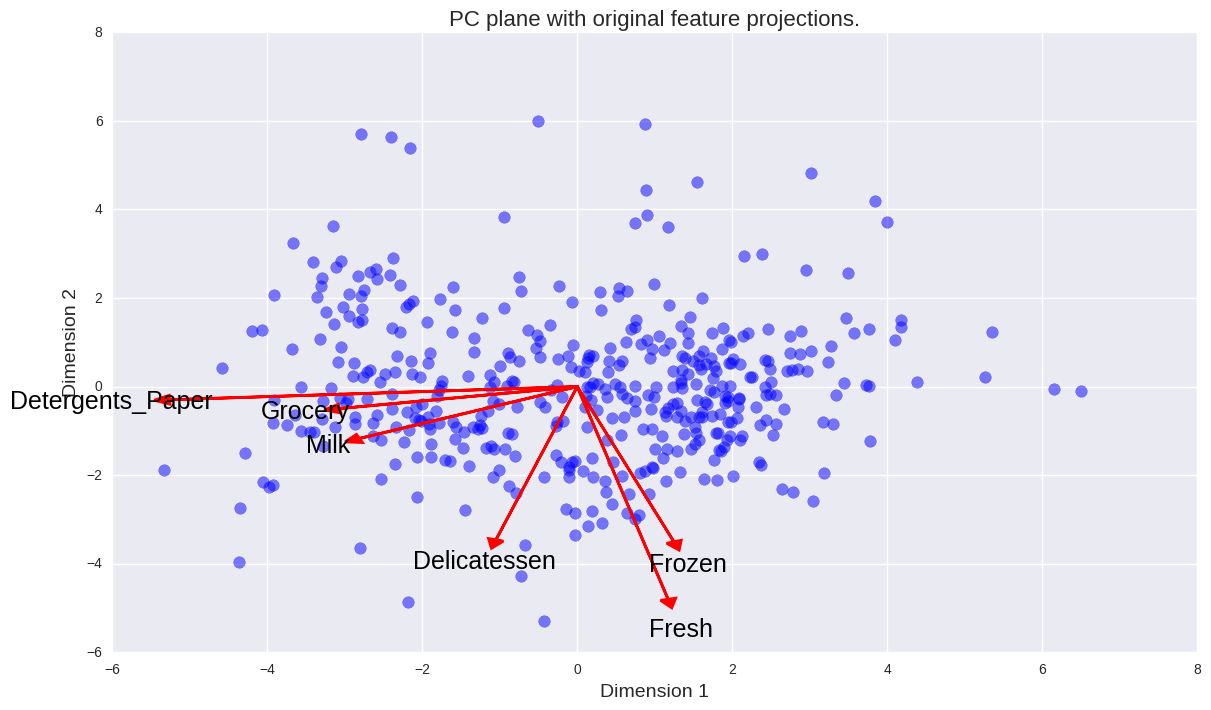

In [20]:
# Create a biplot
vs.biplot(good_data,reduced_data,pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- Computational Speed
KMeans is explained in a loop of two steps: assign each sample of the dataset to its nearest centroid than calculates the new centroid by taking the mean value of the samples of the previous centroid. The computational cost here is to calculate the mean value of the samples.
The computational cost of GaussianMixture is to calculate the mean and the standard deviation to build the maximum Gaussian likelihood. 

Therefore, the KMeans is the fastest clustering algorithm.

- Scalability
KMeans presents a very large scalability, while GaussianMixture is not scalable.

- Hard/Soft Clustering
The next image might help in the understating of hard vs soft clustering

<img src="files/kmeans_gmm.jpg">

Both algorithms uses clusters centers to model the data, but KMeans tends to find clusters of comparable spatial extent, while GaussianMixture can find different shapes of clusters.
Given the data, find the cluster just looking at it can not be done (not efficiently), and it cannot be inferred the shape and number of the clusters yet. My first guess would be to use GaussianMixture, so the algorithm would find the best number of clusters. Then, use this number of clusters with the KMeans to compare the scores.

Reference: 

- http://scikit-learn.org/stable/modules/clustering.html#k-means

- http://scikit-learn.org/stable/modules/mixture.html#mixture

- Some slide picture from London Imperial College - EE462

- https://en.wikipedia.org/wiki/K-means_clustering

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in range(2,11):
    GMclusterer = GaussianMixture(n_components=n,random_state=23).fit(reduced_data)
    KMclusterer = KMeans(n_clusters=n,random_state=23).fit(reduced_data)
    
    GMpreds = GMclusterer.predict(reduced_data)
    KMpreds = KMclusterer.predict(reduced_data)
    
    GMcenters = GMclusterer.means_
    KMcenters = KMclusterer.cluster_centers_
    
    GMsample_preds = GMclusterer.predict(pca_samples)
    KMsample_preds = KMclusterer.predict(pca_samples)
    
    GMscore = silhouette_score(reduced_data,GMpreds,random_state=23)
    KMscore = silhouette_score(reduced_data,KMpreds,random_state=23)
    print '{} clusters:\nSilhouette score GaussianMixutre:\t{}\nSilhouette score KMeans:\t\t{}\n'.format(n,GMscore,KMscore)
    
    #Using the best clustering method and number: KMeans with 2 clusters
    clusterer = KMeans(n_clusters=2,random_state=23).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds,random_state=23)

2 clusters:
Silhouette score GaussianMixutre:	0.421916846463
Silhouette score KMeans:		0.426281015469

3 clusters:
Silhouette score GaussianMixutre:	0.37420184754
Silhouette score KMeans:		0.388985925248

4 clusters:
Silhouette score GaussianMixutre:	0.319111772625
Silhouette score KMeans:		0.332581976

5 clusters:
Silhouette score GaussianMixutre:	0.288747787808
Silhouette score KMeans:		0.350990778931

6 clusters:
Silhouette score GaussianMixutre:	0.329292610944
Silhouette score KMeans:		0.365517105259

7 clusters:
Silhouette score GaussianMixutre:	0.321332692414
Silhouette score KMeans:		0.36487535911

8 clusters:
Silhouette score GaussianMixutre:	0.319017698276
Silhouette score KMeans:		0.355630271455

9 clusters:
Silhouette score GaussianMixutre:	0.299128968159
Silhouette score KMeans:		0.363918575366

10 clusters:
Silhouette score GaussianMixutre:	0.308485020337
Silhouette score KMeans:		0.36769626852



### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

- Silhouette score:

| Number of Clusters        | 2 | 3 | 4 | 5 |
| :-------------: | :---: | :---: | :---: | :---: |
| GaussianMixture | 0.4219 | 0.3742 | 0.3191 | 0.2887 |
| KMeans          | 0.4262 | 0.3889 | 0.3325 | 0.3509 |

The best score is KMeans with 2 clusters


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

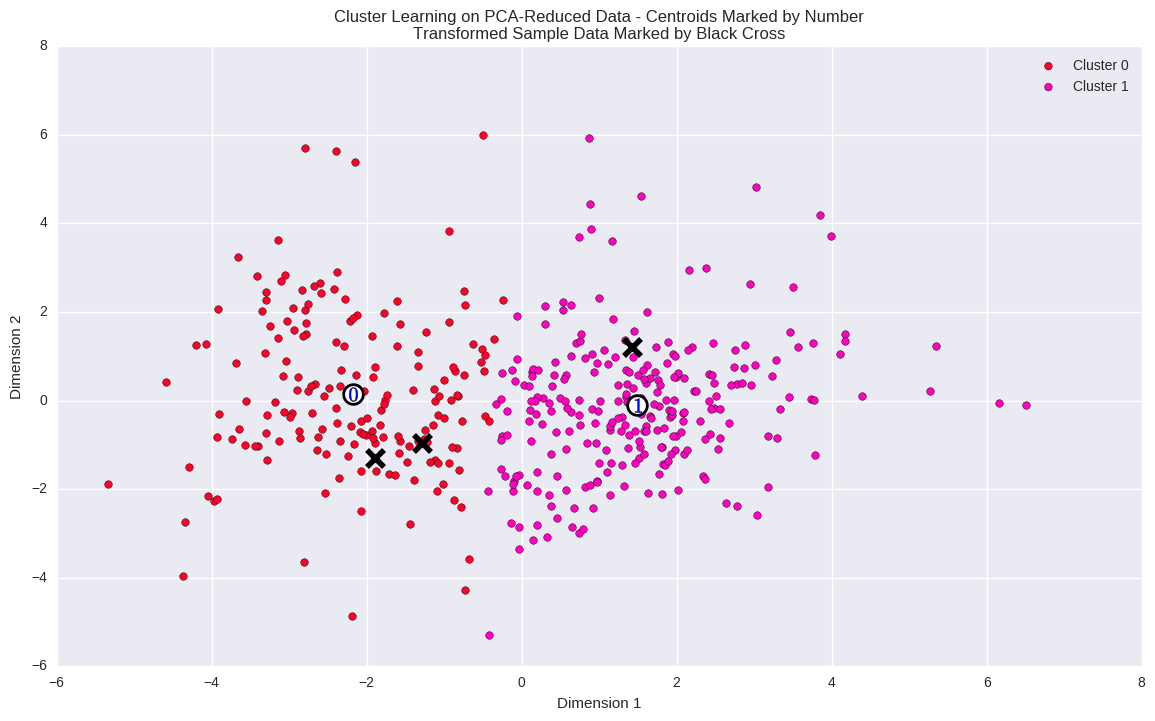

In [22]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
**After first review**
Comparing the last result with the statistical description of the dataset: 

|           | Fresh    | Milk    |	Grocery | Frozen  | Detergents_Paper | Delicatessen |
| :-------: | :------: | :-----: | :------: | :-----: | :--------------: | :----------: |
| Segment 0 | 4005   | 7900  |	12104 | 952  | 4561            | 1036        |
| Segment 1 | 8867   | 1897  |	2477 | 2088  | 294           | 681        |
| Mean      | 12000 | 5796 | 7951  | 3071 | 2881         |1524       |
    
Segment 0: One customer segment is represented by consuming more Milk,Grocery and Detergents_Paper than the mean. This could represent a coffee shop or a restaurant. 

Segment 1: The other customer is represented by consuming all products under the general average, which could represent a retail store.




---------------------------------------------------------------------------------------------------------------------
**Before First review**
Comparing the last result with the statistical description of the dataset: 

|           | Fresh    | Milk    |	Grocery | Frozen  | Detergents_Paper | Delicatessen |
| :-------: | :------: | :-----: | :------: | :-----: | :--------------: | :----------: |
| Segment 0 | 9444   | 1937  |	2453 | 2169  | 305            | 774        |
| Segment 1 | 5427   | 7781  |	11537 | 1120  | 4438           |1138        |
| Mean      | 12000 | 5796 | 7951  | 3071 | 2881         |1524       |
    
Segment 1: One customer segment is represented by consuming more Milk,Grocery and Detergents_Paper than the mean. This could represent a coffee shop or a restaurant. 

Segment 0: The other customer is represented by consuming more Frozen and Fresh, which could represent a retail store.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Analyzing the prediction with all the data from the samples:

|        | Fresh| Milk| Grocery| Frozen| Detergents_Paper| Delicatessen| Cluster|
| :-----:| |:--:| :--:| :-----:| :----:| :--------------:| :----------:| :-----:|
| Sample0| 21217| 6208| 14982  | 3095  | 6707 	         | 602         | 0      |
| Sample1| 16448| 6243| 6360   | 824   | 2662 	         | 2005        | 0      |
| Sample2| 8607 | 1750| 3580   | 47    | 84 	         | 2501        | 1      |

Considering that the segment 0 is defined by using more Milk,Grocery and Detergents_Paper, Sample0 and Sample1 does fit the predicted result (The sample2 presented a value higher for Delicatessen than the mean, but this still fits the model).
Then, the segment 1 is defined by staying under the general average amount of products: Sample2 was defined in this segment, and it's consistent with the model too, the only difference was that this customer bought more Delicatessen than the mean.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Changing the the delivery service in order to reduce it will not affect all customers equally. It depends how big the storage of the customer is, and how much is needed to be storage. If the customer have a high daily demand of products, as the segment 1 ( which was classified as a restaurant or coffee shop), this segment usually does not have available large rooms to storage the products for few days, so the change in the delivery will create some troubles. 
On the other side, usually retail store can storage more products, since it doesn't need to occupy the space with tables and chairs. And one more thing, looking at the data, the retail store usually by less than the other segment. Therefore, this customer would be less affected with the change in the delivery service.

**Update - First revision**
The A/B test can be explained with this example: Given a population, you send two different messages to them and as result see which message got a better result. 
Applying this to the customer-service problem:
Given the 2 clusters, which means 2 populations, the change in the delivery service could be changed to half of them. Which means, half of the customers of Segment 0 and 1 would be getting the reduced delivery service. After some defined time (maybe a couple of months) the result of it could be analyzed and determine if the change would be profit or not.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Using supervised learning, the target variable would be which delivery service should be used, given the customer segment and and estimative on annual spending of each product. So, it can be used some classification algorithm, as Linear SVC or even Naive Bayes, on the data to predict the best service. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

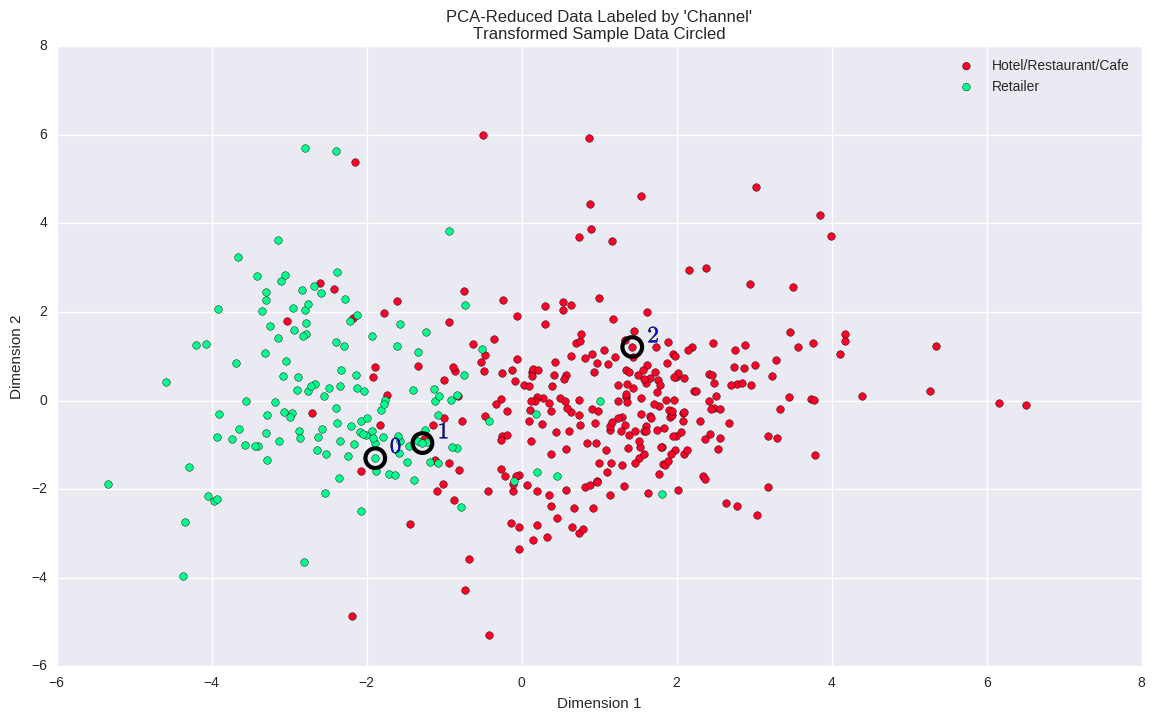

In [25]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The clustering algorithm achieved a good result predicting each segment. The difference between the plots, is mostly in the division of the clusters. While the clustering algorithm separated it exactly in the margin, the plot with the 'Channel' presented that this division is not so defined. Therefore, predictions in the transition zone would present a lower score, which means to the company that it would get some negative review of the service given.
The plot with the 'Channel' classified more Hotels/Restaurants/Cafe than Retailers compared to the last plot. But, as analyzed, the difference is mostly presented on the transition of each cluster. Therefore this classification is consistent with the previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.